In [1]:
import pandas as pd
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline 


## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
%cd ../../Lectures/data
! ls

/media/filippo/HDD 1 TB TOSHIBA/Unipd/Magistrale/Laboratory of computational physics/A/Lectures/data
data_000637.dat  data_000637.txt  magic04.data	magic04.names


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.


In [3]:
N = 50000  
names = ["HEAD", "FPGA", "TDC_CHANNEL", "ORBIT_CNT", "BX_COUNTER", "TDC_MEAS"]
data = pd.read_csv("data_000637.txt", sep = ",", header = 0, names = names, skiprows = N)

data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,63,3869200664,1195,27
1,1,0,57,3869200664,1193,18
2,1,0,139,3869200664,1204,0
3,1,0,64,3869200664,1202,28
4,1,0,58,3869200664,1202,10
...,...,...,...,...,...,...
1260715,1,0,62,3869211171,762,14
1260716,1,1,4,3869211171,763,11
1260717,1,0,64,3869211171,764,0
1260718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

In [5]:
x = data["BX_COUNTER"].max()+1

print("\nNumber of BX in a ORBIT (=> x value): ", x, "\n")


Number of BX in a ORBIT (=> x value):  3564 



3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [6]:
init = data["ORBIT_CNT"][0]*x*25 + data["BX_COUNTER"][0]*25 + data["TDC_MEAS"][0]*25/30
print("Initial time: {} ns".format(init))

fin = data["ORBIT_CNT"][data.shape[0]-1]*3564*25 + data["BX_COUNTER"][data.shape[0]-1]*25 + data["TDC_MEAS"][data.shape[0]-1]*25/30
print("Final time: {} ns".format(fin))

diff = fin-init
print("\n=> The data taking lasted: {} ns".format(diff))
print("\n=> The data taking lasted: {:.2f} s".format(diff*10e-9))

Initial time: 344745779192297.5 ns
Final time: 344746715355165.0 ns

=> The data taking lasted: 936162867.5 ns

=> The data taking lasted: 9.36 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [7]:
data["Time (ns)"] = data["ORBIT_CNT"]*x*25 + data["BX_COUNTER"]*25 + data["TDC_MEAS"]*25/30

data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time (ns)
0,1,0,63,3869200664,1195,27,3.447458e+14
1,1,0,57,3869200664,1193,18,3.447458e+14
2,1,0,139,3869200664,1204,0,3.447458e+14
3,1,0,64,3869200664,1202,28,3.447458e+14
4,1,0,58,3869200664,1202,10,3.447458e+14
...,...,...,...,...,...,...,...
1260715,1,0,62,3869211171,762,14,3.447467e+14
1260716,1,1,4,3869211171,763,11,3.447467e+14
1260717,1,0,64,3869211171,764,0,3.447467e+14
1260718,1,0,139,3869211171,769,0,3.447467e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [8]:
data["HEAD"] = npr.randint(2, size = data.shape[0])

data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time (ns)
0,1,0,63,3869200664,1195,27,3.447458e+14
1,0,0,57,3869200664,1193,18,3.447458e+14
2,1,0,139,3869200664,1204,0,3.447458e+14
3,1,0,64,3869200664,1202,28,3.447458e+14
4,0,0,58,3869200664,1202,10,3.447458e+14
...,...,...,...,...,...,...,...
1260715,1,0,62,3869211171,762,14,3.447467e+14
1260716,0,1,4,3869211171,763,11,3.447467e+14
1260717,0,0,64,3869211171,764,0,3.447467e+14
1260718,1,0,139,3869211171,769,0,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [9]:
mod_data = data.copy()
mod_data = mod_data[mod_data.HEAD == 1]

mod_data


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time (ns)
0,1,0,63,3869200664,1195,27,3.447458e+14
2,1,0,139,3869200664,1204,0,3.447458e+14
3,1,0,64,3869200664,1202,28,3.447458e+14
8,1,0,58,3869200664,1399,11,3.447458e+14
9,1,0,60,3869200664,1408,15,3.447458e+14
...,...,...,...,...,...,...,...
1260711,1,1,39,3869211171,430,0,3.447467e+14
1260712,1,1,35,3869211171,429,4,3.447467e+14
1260715,1,0,62,3869211171,762,14,3.447467e+14
1260718,1,0,139,3869211171,769,0,3.447467e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

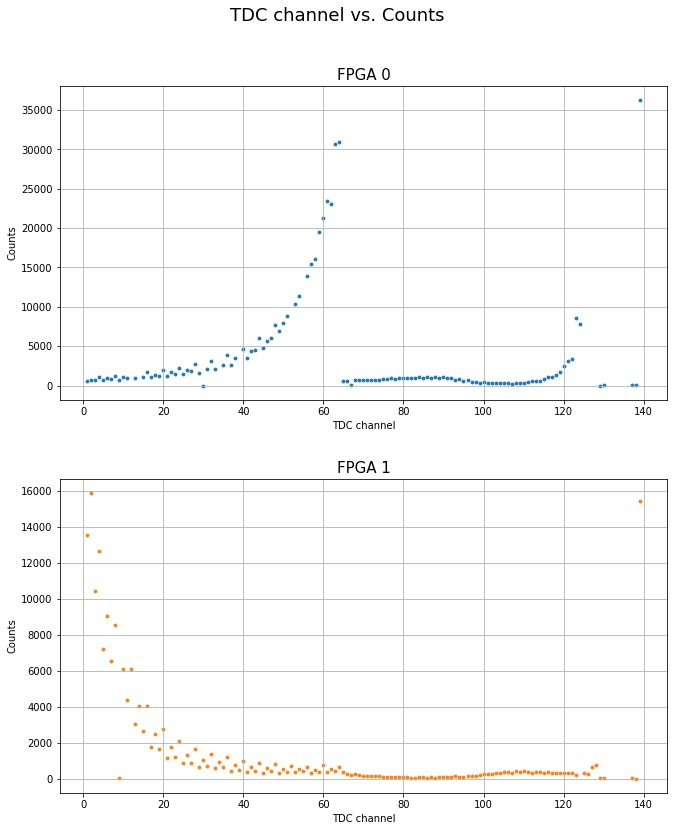

In [11]:
FPGA0 = mod_data[mod_data.FPGA == 0].TDC_CHANNEL.value_counts()
FPGA1 = mod_data[mod_data.FPGA == 1].TDC_CHANNEL.value_counts()


fig, (ax0, ax1) = plt.subplots(2, figsize = (10, 12))
fig.suptitle("TDC channel vs. Counts", fontsize = 18)
plt.setp((ax0, ax1), xlabel = "TDC channel", ylabel = "Counts")
ax0.scatter(FPGA0.index, FPGA0.values, s = 8)
ax0.set_title("FPGA 0", size = 15)
ax0.grid()
ax1.scatter(FPGA1.index, FPGA1.values, s = 8, c = "#ff7f0e")
ax1.set_title("FPGA 1", size = 15)
ax1.grid()
fig.tight_layout(pad = 3)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [12]:
TopCounts = data.groupby("TDC_CHANNEL").size().reset_index(name = "Counts").sort_values("Counts", ascending = False)

TopCounts[:3]

,TDC_CHANNEL,Counts
132,139,103884
63,64,63497
62,63,62170


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [18]:
uniqueSize1 = data.ORBIT_CNT.nunique()
print("\nNumber of unique orbits:", uniqueSize1)

uniqueSize2 = data[data["TDC_CHANNEL"] == 139]["ORBIT_CNT"].nunique()
print("\nNumber of unique orbits with at least one measurement from TDC_CHANNEL = 139:", uniqueSize2)


Number of unique orbits: 10504

Number of unique orbits with at least one measurement from TDC_CHANNEL = 139: 10479
